## Data Cleaning and exploratory analysis with Time Series Data

In [1]:
import pandas as pd

Loading and Cleaning of data

In [2]:
df_raw = pd.read_csv("CAF3101.txt", delimiter = "\t")

In [3]:
df_raw.head()

,Location,Date,Time,VW_30cm,VW_60cm,VW_90cm,VW_120cm,VW_150cm,T_30cm,T_60cm,T_90cm,T_120cm,T_150cm
0,CAF310,04/20/2007,0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CAF310,04/20/2007,1:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CAF310,04/20/2007,2:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CAF310,04/20/2007,3:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CAF310,04/20/2007,4:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_raw.describe()

,VW_30cm,VW_60cm,VW_90cm,VW_120cm,VW_150cm,T_30cm,T_60cm,T_90cm,T_120cm,T_150cm
count,49801.000000,47566.000000,49801.000000,51323.000000,49818.00000,49801.000000,47601.000000,49801.000000,51323.000000,49818.000000
mean,0.277151,0.279833,0.301686,0.318969,0.29070,10.845991,9.674150,9.472288,9.428210,9.131461
std,0.063250,0.066458,0.064209,0.056014,0.04209,6.094472,4.821221,4.090415,3.453739,2.897674
min,0.186000,0.188000,0.215000,0.234000,0.22000,1.000000,2.000000,2.200000,3.400000,3.600000
25%,0.206000,0.204000,0.232000,0.260000,0.24800,5.500000,5.100000,5.500000,6.400000,6.400000
50%,0.295000,0.310000,0.331000,0.344000,0.28300,11.400000,9.500000,9.400000,9.300000,9.000000
75%,0.337000,0.344000,0.364000,0.370000,0.33400,16.600000,14.400000,13.300000,12.600000,11.800000
max,0.390000,0.367000,0.378000,0.393000,0.35300,22.400000,18.300000,16.300000,15.800000,14.400000


In [6]:
df_raw.dtypes

Location     object
Date         object
Time         object
VW_30cm     float64
VW_60cm     float64
VW_90cm     float64
VW_120cm    float64
VW_150cm    float64
T_30cm      float64
T_60cm      float64
T_90cm      float64
T_120cm     float64
T_150cm     float64
dtype: object

making a copy of the raw data so that we can go back and refer to it later

In [3]:
df = df_raw.copy()

In [8]:
df

,Location,Date,Time,VW_30cm,VW_60cm,VW_90cm,VW_120cm,VW_150cm,T_30cm,T_60cm,T_90cm,T_120cm,T_150cm
0,CAF310,04/20/2007,0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CAF310,04/20/2007,1:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CAF310,04/20/2007,2:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CAF310,04/20/2007,3:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CAF310,04/20/2007,4:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80299,CAF310,06/16/2016,19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80300,CAF310,06/16/2016,20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80301,CAF310,06/16/2016,21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80302,CAF310,06/16/2016,22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Combining the ‘Date’ and ‘Time’ columns into a column called ‘Datetime’ and
converting it into a datetime datatype.

In [4]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%m/%d/%Y %H:%M')

using the pd.to_numeric function to convert the rest of the columns

In [5]:
df[df.columns[4:-1]] = df[df.columns[4:-1]].apply(pd.to_numeric, errors ='coerce')

In [15]:
middle_rows = df.iloc[60000 : 75000]
print(middle_rows)

      Location        Date   Time  VW_30cm  VW_60cm  VW_90cm  VW_120cm  \
60000   CAF310  02/22/2014   0:00    0.345    0.336    0.350     0.325   
60001   CAF310  02/22/2014   1:00    0.345    0.336    0.350     0.326   
60002   CAF310  02/22/2014   2:00    0.344    0.336    0.350     0.326   
60003   CAF310  02/22/2014   3:00    0.344    0.336    0.350     0.327   
60004   CAF310  02/22/2014   4:00    0.344    0.336    0.351     0.327   
...        ...         ...    ...      ...      ...      ...       ...   
74995   CAF310  11/08/2015  19:00    0.204    0.189    0.223     0.246   
74996   CAF310  11/08/2015  20:00    0.204    0.189    0.223     0.246   
74997   CAF310  11/08/2015  21:00    0.204    0.189    0.223     0.246   
74998   CAF310  11/08/2015  22:00    0.204    0.189    0.223     0.246   
74999   CAF310  11/08/2015  23:00    0.204    0.189    0.223     0.246   

       VW_150cm  T_30cm  T_60cm  T_90cm  T_120cm  T_150cm            Datetime  
60000     0.304     2.7     2.7

Using the Datetime column to turn the Date and Time columns into date and time dtypes.


In [6]:
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

In [18]:
df.dtypes

Location            object
Date                object
Time                object
VW_30cm            float64
VW_60cm            float64
VW_90cm            float64
VW_120cm           float64
VW_150cm           float64
T_30cm             float64
T_60cm             float64
T_90cm             float64
T_120cm            float64
T_150cm            float64
Datetime    datetime64[ns]
dtype: object

It looks like our Date and Time columns are still of type “object”, but in that case that’s because
the pandas dtypes function doesn’t recognize all data types. We can check this by printing out the
first value of each column directly.

In [19]:
df.Date[0]

datetime.date(2007, 4, 20)

In [20]:
df.Time[0]

datetime.time(0, 0)

Now that we’ve got the data in the right datatypes, let’s take a look at the describe() results


In [22]:
##using datetime_is_numeric = True to get statistics on the datetime colum
desc = df.describe(datetime_is_numeric = True)

In [25]:
#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,VW_30cm,VW_60cm,VW_90cm,VW_120cm,VW_150cm,T_30cm,T_60cm,T_90cm,T_120cm,T_150cm,Datetime
count,49801.0000,47566.0000,49801.0000,51323.0000,49818.0000,49801.0000,47601.0000,49801.0000,51323.0000,49818.0000,80304
mean,0.2772,0.2798,0.3017,0.3190,0.2907,10.8460,9.6741,9.4723,9.4282,9.1315,2011-11-17 23:30:00
min,0.1860,0.1880,0.2150,0.2340,0.2200,1.0000,2.0000,2.2000,3.4000,3.6000,2007-04-20 00:00:00
25%,0.2060,0.2040,0.2320,0.2600,0.2480,5.5000,5.1000,5.5000,6.4000,6.4000,2009-08-03 11:45:00
50%,0.2950,0.3100,0.3310,0.3440,0.2830,11.4000,9.5000,9.4000,9.3000,9.0000,2011-11-17 23:30:00
75%,0.3370,0.3440,0.3640,0.3700,0.3340,16.6000,14.4000,13.3000,12.6000,11.8000,2014-03-03 11:15:00
max,0.3900,0.3670,0.3780,0.3930,0.3530,22.4000,18.3000,16.3000,15.8000,14.4000,2016-06-16 23:00:00
std,0.0632,0.0665,0.0642,0.0560,0.0421,6.0945,4.8212,4.0904,3.4537,2.8977,NaN


Those row counts look a little funky. Let’s visualize our missing data.

<AxesSubplot:>

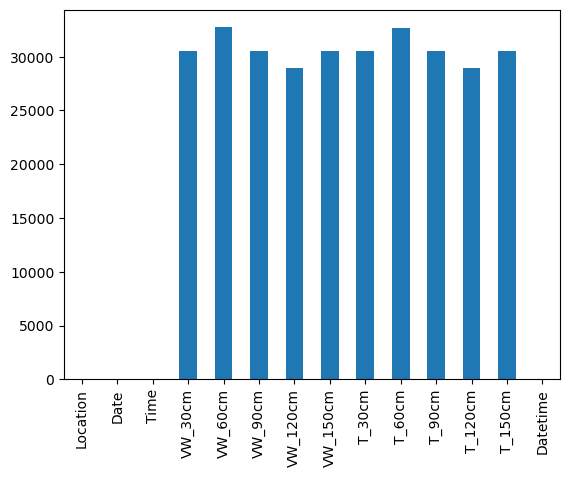

In [27]:
df.isna().sum().plot.bar()

<AxesSubplot:xlabel='Date'>

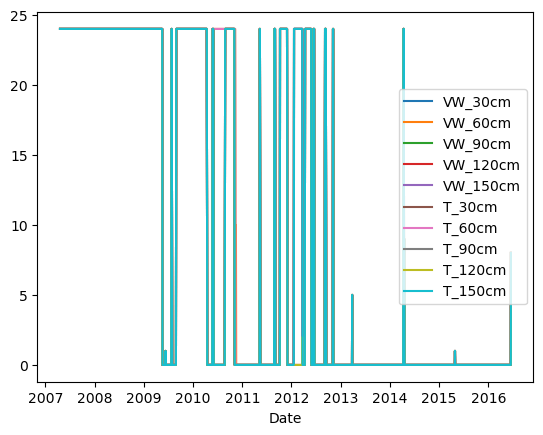

In [7]:
df_na = df.drop('Date', axis = 1).isna().groupby(df.Date, sort = False).sum().reset_index()
df_na.plot('Date', df_na.columns[3:-1])

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

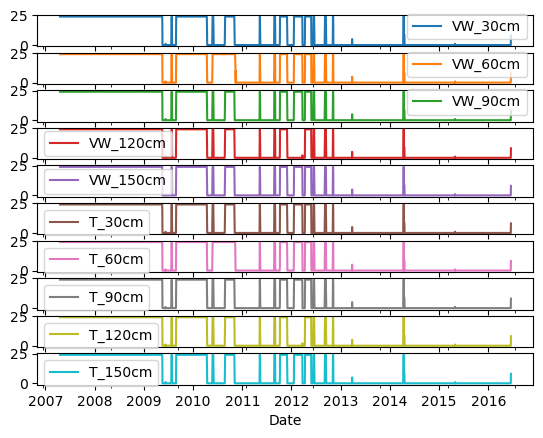

In [7]:
df_na = df.drop('Date', axis = 1).isna().groupby(df.Date, sort = False).sum().reset_index()
df_na.plot('Date', df_na.columns[3:-1],subplots = True)

What do we notice about the pattern of missing data?
Since there isnt a perfect overlap in the missing data for the different sensors , we cant conclude that all the sensors turn off simultaneously. However we can conclude that the temperature and moisture sensors located at 30 cm and 90 cm inside the soil do turn off simultaneously. 
Also we can see that for each sensor, data is missing in large continuous chunks.even for the entire 24 hrs for consecutive days.


In [29]:
missing_values = df.isnull().sum()

In [30]:
print(missing_values)

Location        0
Date            0
Time            0
VW_30cm     30503
VW_60cm     32738
VW_90cm     30503
VW_120cm    28981
VW_150cm    30486
T_30cm      30503
T_60cm      32703
T_90cm      30503
T_120cm     28981
T_150cm     30486
Datetime        0
dtype: int64


Imputing missing values with the median 

df.median() calculates the median value of each column in the DataFrame df.
df.fillna() fills in missing values in the DataFrame df with the values specified in the parentheses. In this case,
we're filling in the missing values with the median of each column, which we calculated in step 1.

why median?

The median is a robust statistic that is not influenced by extreme values or outliers in the data. So its a safe approach. If a column contains outliers or extreme values, using the mean as a replacement for missing values could skew the distribution. Using the median can provide a more representative measure of central tendency.

In [8]:
median_values = df.median()
df = df.fillna(median_values)

C:\Users\Francina Pali\AppData\Local\Temp\ipykernel_42052\2382661038.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  median_values = df.median()
C:\Users\Francina Pali\AppData\Local\Temp\ipykernel_42052\2382661038.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median_values = df.median()


In [33]:
print(median_values)

VW_30cm      0.295
VW_60cm      0.310
VW_90cm      0.331
VW_120cm     0.344
VW_150cm     0.283
T_30cm      11.400
T_60cm       9.500
T_90cm       9.400
T_120cm      9.300
T_150cm      9.000
dtype: float64


In [36]:
missing_values = df.isnull().sum()

In [38]:
print(missing_values)

Location    0
Date        0
Time        0
VW_30cm     0
VW_60cm     0
VW_90cm     0
VW_120cm    0
VW_150cm    0
T_30cm      0
T_60cm      0
T_90cm      0
T_120cm     0
T_150cm     0
Datetime    0
dtype: int64


In [39]:
desc = df.describe(datetime_is_numeric = True)

In [40]:
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,VW_30cm,VW_60cm,VW_90cm,VW_120cm,VW_150cm,T_30cm,T_60cm,T_90cm,T_120cm,T_150cm,Datetime
count,80304.0000,80304.0000,80304.0000,80304.0000,80304.0000,80304.0000,80304.0000,80304.0000,80304.0000,80304.0000,80304
mean,0.2839,0.2921,0.3128,0.3280,0.2878,11.0564,9.6032,9.4448,9.3819,9.0816,2011-11-17 23:30:00
min,0.1860,0.1880,0.2150,0.2340,0.2200,1.0000,2.0000,2.2000,3.4000,3.6000,2007-04-20 00:00:00
25%,0.2450,0.2420,0.2460,0.2890,0.2750,8.4000,7.5000,7.3000,7.7000,7.8000,2009-08-03 11:45:00
50%,0.2950,0.3100,0.3310,0.3440,0.2830,11.4000,9.5000,9.4000,9.3000,9.0000,2011-11-17 23:30:00
75%,0.3170,0.3340,0.3580,0.3600,0.3190,14.0000,11.4000,11.3000,11.0000,10.3000,2014-03-03 11:15:00
max,0.3900,0.3670,0.3780,0.3930,0.3530,22.4000,18.3000,16.3000,15.8000,14.4000,2016-06-16 23:00:00
std,0.0506,0.0533,0.0525,0.0464,0.0334,4.8069,3.7129,3.2214,2.7617,2.2832,NaN


## Visualizing the data

We’re working with time series data, so visualizing the data over time can be helpful in identifying
possible patterns or metrics that should be explored with further analysis and machine learning
methods.


The variables VW_30cm, T_30cm, VW_60cm, and T_60cm would be interesting to compare to each other over time due to their relationship and relevance to soil conditions. Here's why:

VW_30cm (Volumetric Water Content at 30cm depth): This variable represents the amount of water present in the soil at a depth of 30cm. It indicates the soil's water-holding capacity at a relatively shallow depth.


VW_60cm (Volumetric Water Content at 60cm depth): This variable represents the amount of water present in the soil at a depth of 60cm. Comparing VW_60cm with VW_30cm allows you to assess the vertical movement of water within the soil profile.

T_30cm (Temperature at 30cm depth): This variable represents the soil temperature at a depth of 30cm. Soil temperature influences various biological and chemical processes in the soil, such as nutrient availability, microbial activity, and plant growth.

T_60cm (Temperature at 60cm depth): This variable represents the soil temperature at a depth of 60cm. Comparing T_60cm with T_30cm allows you to observe how soil temperature changes with depth, which can influence plant root development and water availability.

By comparing VW_30cm, T_30cm, VW_60cm, and T_60cm over time, you can gain insights into soil moisture dynamics, temperature variations with depth, and their potential impacts on plant growth and soil health. Understanding the relationship between water content and temperature at different depths helps in studying soil water availability and its influence on plant performance.




In [43]:
df.columns

Index(['Location', 'Date', 'Time', 'VW_30cm', 'VW_60cm', 'VW_90cm', 'VW_120cm',
       'VW_150cm', 'T_30cm', 'T_60cm', 'T_90cm', 'T_120cm', 'T_150cm',
       'Datetime'],
      dtype='object')

array([<AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>],
      dtype=object)

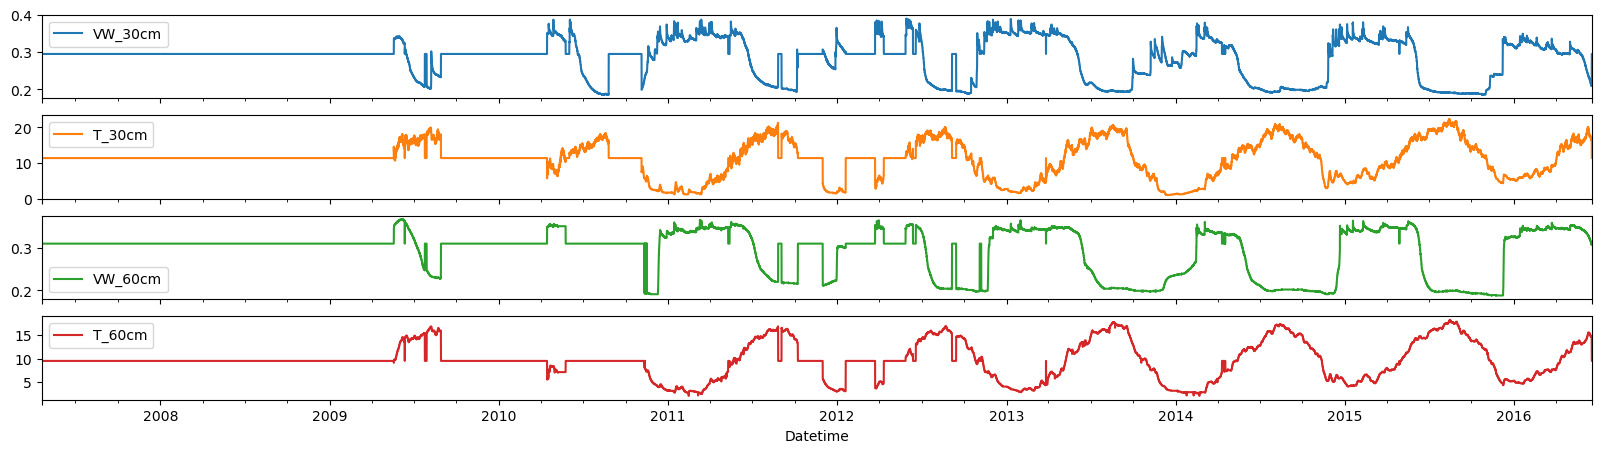

In [44]:
#building our line chart here
df.plot('Datetime', ['VW_30cm', 'T_30cm', 'VW_60cm',
'T_60cm'], subplots = True, figsize = (20,5))


 We can infer from the plot that there can be a  correlation between VW_30cm and VW_60cm and also between T_30cm and T_60cm as they exhibit a similar trend. Although from the plot we were able to notice a
trend,each individual line in the plot contains a lot of noise.

In [45]:
#computing monthly average here
#the pd.Grouper function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html?highlight=grouper
df_avg = df.groupby(pd.Grouper(key = "Datetime", freq = "1M")).mean()

array([<AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>],
      dtype=object)

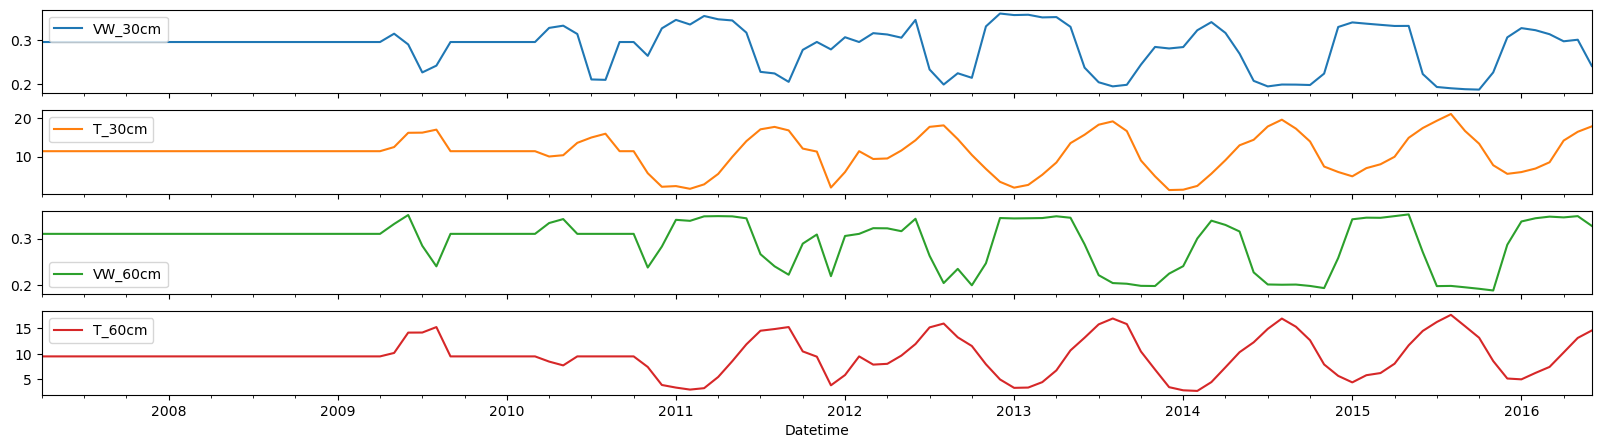

In [46]:
#build your linechart here
df_avg.plot(y=['VW_30cm', 'T_30cm', 'VW_60cm',
'T_60cm'], use_index = True, subplots = True, figsize = (20,5))


This plot also supports the idea that there is a  relationship between VW_30cm and VW_60cm
and even between T_30cm and T_60cm  as they display a similar pattern of movement (i.e., they show a consistent trend
together).

## Moving average computed here 

In [47]:
#computing  moving average here
df[['VW_30cm_monthly', 'T_30cm_monthly', 'VW_60cm_monthly', 'T_60cm_monthly']] =df[['VW_30cm', 'T_30cm', 'VW_60cm','T_60cm']].rolling(720).mean()


array([<AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>],
      dtype=object)

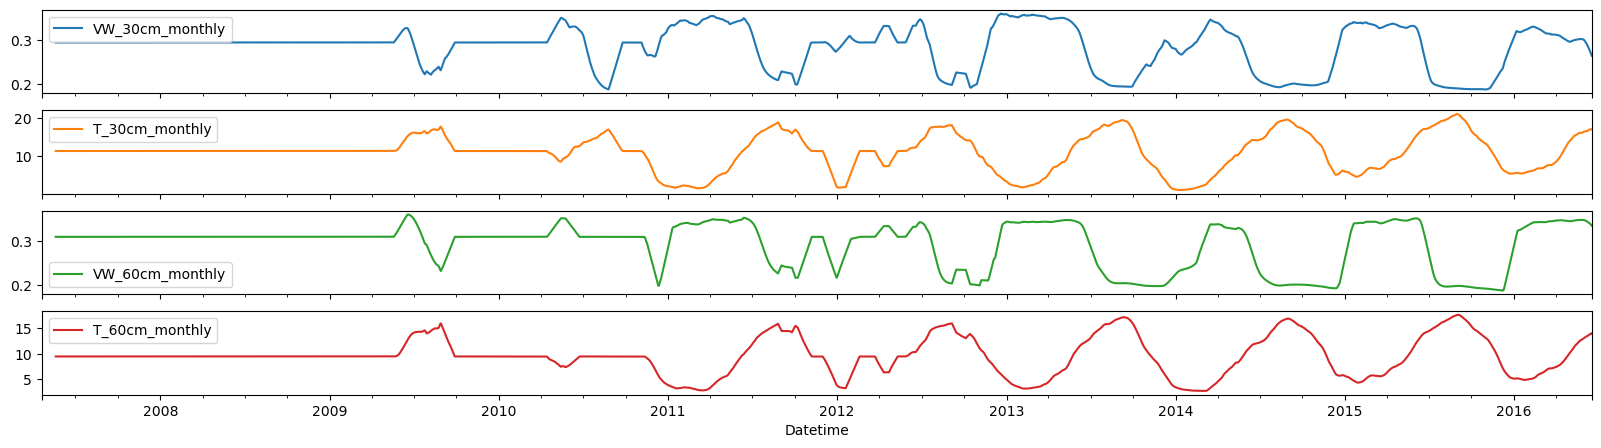

In [48]:
#build your line chart on the moving average here
df.plot('Datetime', ['VW_30cm_monthly', 'T_30cm_monthly', 'VW_60cm_monthly', 'T_60cm_monthly'],
subplots = True, figsize = (20,5))


The moving average still has a data point for every single reading, just averaged over the past
month. Meaning, Despite the smoother appearance of the chart, the use of a moving average results in less overall data loss compared to the monthly average.
Although there may not be a significant visual difference between the two methods, the moving average is generally preferable because it results in less data loss compared to the monthly average. (taken from the solutions given for assignment 2 as I found the explanation  to be quite reasonable and understandable.)

## Data Covariance and Correlation

In [11]:
import matplotlib.pyplot as plt


Let’s take a look at the Correlation Matrix .

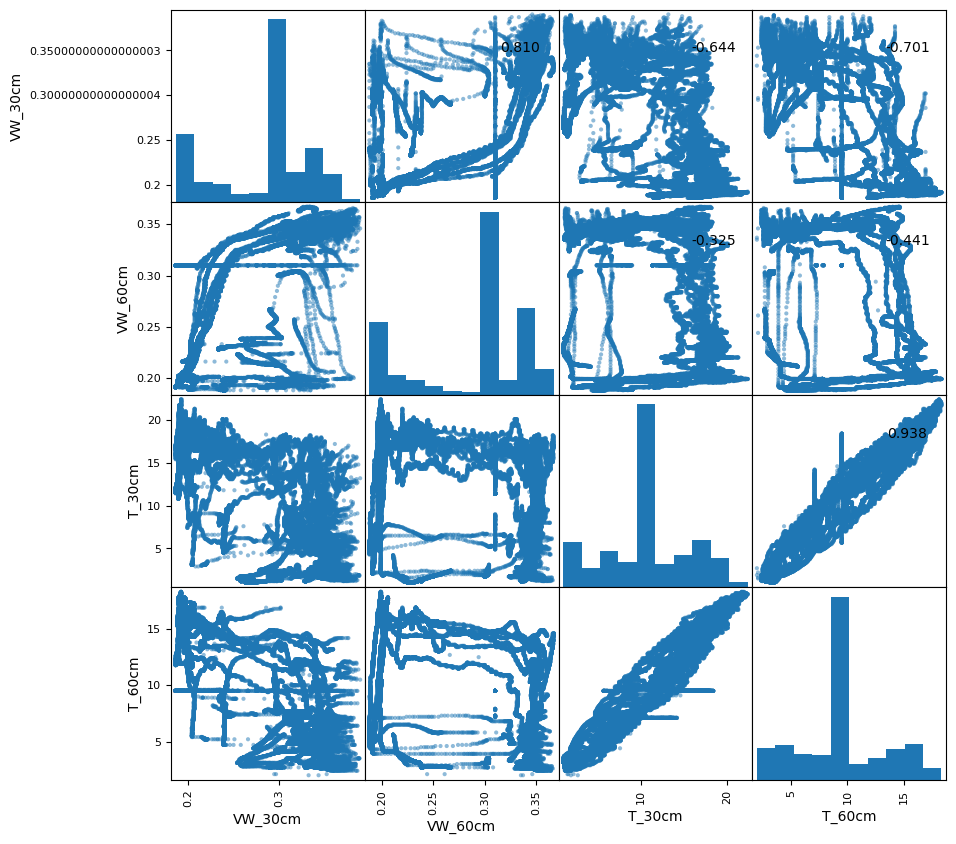

In [12]:
axes = pd.plotting.scatter_matrix(df[['VW_30cm', 'VW_60cm', 'T_30cm', 'T_60cm']], alpha=0.5,figsize = [10,10])
corr = df[['VW_30cm', 'VW_60cm', 'T_30cm', 'T_60cm']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

T_30cm  and T_60cm are correlated. This means that
we shouldn’t use both of these variables in the same model since they provide the same information.

In [52]:
middle_rows = df.iloc[60000 : 75000]
print(middle_rows)

      Location        Date      Time  VW_30cm  VW_60cm  VW_90cm  VW_120cm  \
60000   CAF310  2014-02-22  00:00:00    0.345    0.336    0.350     0.325   
60001   CAF310  2014-02-22  01:00:00    0.345    0.336    0.350     0.326   
60002   CAF310  2014-02-22  02:00:00    0.344    0.336    0.350     0.326   
60003   CAF310  2014-02-22  03:00:00    0.344    0.336    0.350     0.327   
60004   CAF310  2014-02-22  04:00:00    0.344    0.336    0.351     0.327   
...        ...         ...       ...      ...      ...      ...       ...   
74995   CAF310  2015-11-08  19:00:00    0.204    0.189    0.223     0.246   
74996   CAF310  2015-11-08  20:00:00    0.204    0.189    0.223     0.246   
74997   CAF310  2015-11-08  21:00:00    0.204    0.189    0.223     0.246   
74998   CAF310  2015-11-08  22:00:00    0.204    0.189    0.223     0.246   
74999   CAF310  2015-11-08  23:00:00    0.204    0.189    0.223     0.246   

       VW_150cm  T_30cm  T_60cm  T_90cm  T_120cm  T_150cm            Dateti

## Leveraging Long Short-Term Memory (LSTM) model for temperature prediction  at a soil depth of 30 cm

In [55]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
# Setting seed for reproducibility
np.random.seed(1234)

In [56]:
PYTHONHASHSEED = 0
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, LSTM
from keras.layers.core import Activation
from keras.utils import pad_sequences


In [57]:
df

,Location,Date,Time,VW_30cm,VW_60cm,VW_90cm,VW_120cm,VW_150cm,T_30cm,T_60cm,T_90cm,T_120cm,T_150cm,Datetime,VW_30cm_monthly,T_30cm_monthly,VW_60cm_monthly,T_60cm_monthly,time_diff,time
0,CAF310,2007-04-20,00:00:00,0.295,0.31,0.331,0.344,0.283,11.4,9.5,9.4,9.3,9.0,2007-04-20 00:00:00,NaN,NaN,NaN,NaN,60,60
1,CAF310,2007-04-20,01:00:00,0.295,0.31,0.331,0.344,0.283,11.4,9.5,9.4,9.3,9.0,2007-04-20 01:00:00,NaN,NaN,NaN,NaN,60,120
2,CAF310,2007-04-20,02:00:00,0.295,0.31,0.331,0.344,0.283,11.4,9.5,9.4,9.3,9.0,2007-04-20 02:00:00,NaN,NaN,NaN,NaN,60,180
3,CAF310,2007-04-20,03:00:00,0.295,0.31,0.331,0.344,0.283,11.4,9.5,9.4,9.3,9.0,2007-04-20 03:00:00,NaN,NaN,NaN,NaN,60,240
4,CAF310,2007-04-20,04:00:00,0.295,0.31,0.331,0.344,0.283,11.4,9.5,9.4,9.3,9.0,2007-04-20 04:00:00,NaN,NaN,NaN,NaN,60,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80299,CAF310,2016-06-16,19:00:00,0.295,0.31,0.331,0.344,0.283,11.4,9.5,9.4,9.3,9.0,2016-06-16 19:00:00,0.265035,17.120556,0.335371,14.040556,60,4818000
80300,CAF310,2016-06-16,20:00:00,0.295,0.31,0.331,0.344,0.283,11.4,9.5,9.4,9.3,9.0,2016-06-16 20:00:00,0.265021,17.113333,0.335318,14.035417,60,4818060
80301,CAF310,2016-06-16,21:00:00,0.295,0.31,0.331,0.344,0.283,11.4,9.5,9.4,9.3,9.0,2016-06-16 21:00:00,0.265007,17.105972,0.335267,14.030278,60,4818120
80302,CAF310,2016-06-16,22:00:00,0.295,0.31,0.331,0.344,0.283,11.4,9.5,9.4,9.3,9.0,2016-06-16 22:00:00,0.264993,17.098472,0.335214,14.025139,60,4818180


In [58]:
#creating training and validation sets here

In [59]:
#assign size for data subset
df_size = round(len(df)/10)
#take random data subset
start = np.random.choice(range(0,len(df)-df_size))
df_small = df.iloc[start:start+df_size].reset_index()
#split data subset 80/20 for train/validation
split_point = round(len(df_small)*0.8)
train_df = df_small.iloc[:split_point]
val_df = df_small.iloc[split_point:]


In [66]:
first_row_val_df = val_df.iloc[0]
print(first_row_val_df)

index                            64491
Location                        CAF310
Date                        2014-08-28
Time                          03:00:00
VW_30cm                          0.202
VW_60cm                          0.202
VW_90cm                          0.229
VW_120cm                         0.242
VW_150cm                         0.228
T_30cm                            19.1
T_60cm                            16.4
T_90cm                            15.5
T_120cm                           14.7
T_150cm                           13.4
Datetime           2014-08-28 03:00:00
VW_30cm_monthly               0.198551
T_30cm_monthly               19.622639
VW_60cm_monthly               0.201024
T_60cm_monthly               16.878333
time_diff                           60
time                           3869520
Name: 6424, dtype: object


In [67]:
last_row_val_df = val_df.iloc[-1]
print(last_row_val_df)


index                            66096
Location                        CAF310
Date                        2014-11-03
Time                          00:00:00
VW_30cm                          0.202
VW_60cm                          0.197
VW_90cm                          0.225
VW_120cm                          0.24
VW_150cm                         0.233
T_30cm                            11.8
T_60cm                            10.9
T_90cm                            11.3
T_120cm                           11.8
T_150cm                           11.5
Datetime           2014-11-03 00:00:00
VW_30cm_monthly               0.198797
T_30cm_monthly               13.693333
VW_60cm_monthly                0.19846
T_60cm_monthly                12.38125
time_diff                           60
time                           3965820
Name: 8029, dtype: object


In [68]:
#reset the indices for cleanliness
train_df = train_df.reset_index()
val_df = val_df.reset_index()

In [69]:
train_df

,level_0,index,Location,Date,Time,VW_30cm,VW_60cm,VW_90cm,VW_120cm,VW_150cm,...,T_90cm,T_120cm,T_150cm,Datetime,VW_30cm_monthly,T_30cm_monthly,VW_60cm_monthly,T_60cm_monthly,time_diff,time
0,0,58067,CAF310,2013-12-03,11:00:00,0.323,0.202,0.233,0.261,0.270,...,5.8,7.4,8.0,2013-12-03 11:00:00,0.290411,4.459722,0.198883,6.565278,60,3484080
1,1,58068,CAF310,2013-12-03,12:00:00,0.322,0.202,0.234,0.260,0.270,...,5.8,7.4,8.0,2013-12-03 12:00:00,0.290526,4.452917,0.198889,6.559167,60,3484140
2,2,58069,CAF310,2013-12-03,13:00:00,0.322,0.202,0.233,0.260,0.269,...,5.8,7.4,8.0,2013-12-03 13:00:00,0.290642,4.446111,0.198894,6.553056,60,3484200
3,3,58070,CAF310,2013-12-03,14:00:00,0.322,0.202,0.233,0.260,0.270,...,5.8,7.4,8.0,2013-12-03 14:00:00,0.290757,4.439583,0.198900,6.546944,60,3484260
4,4,58071,CAF310,2013-12-03,15:00:00,0.322,0.202,0.233,0.260,0.269,...,5.8,7.4,8.0,2013-12-03 15:00:00,0.290872,4.433056,0.198906,6.540833,60,3484320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6419,6419,64486,CAF310,2014-08-27,22:00:00,0.202,0.202,0.229,0.242,0.228,...,15.5,14.7,13.4,2014-08-27 22:00:00,0.198489,19.620833,0.200996,16.872083,60,3869220
6420,6420,64487,CAF310,2014-08-27,23:00:00,0.202,0.202,0.229,0.242,0.228,...,15.5,14.7,13.4,2014-08-27 23:00:00,0.198501,19.621250,0.201001,16.873333,60,3869280
6421,6421,64488,CAF310,2014-08-28,00:00:00,0.202,0.202,0.229,0.242,0.228,...,15.5,14.7,13.4,2014-08-28 00:00:00,0.198514,19.621667,0.201007,16.874583,60,3869340
6422,6422,64489,CAF310,2014-08-28,01:00:00,0.202,0.202,0.229,0.242,0.228,...,15.5,14.7,13.4,2014-08-28 01:00:00,0.198526,19.622083,0.201012,16.875833,60,3869400


In [70]:
val_df

,level_0,index,Location,Date,Time,VW_30cm,VW_60cm,VW_90cm,VW_120cm,VW_150cm,...,T_90cm,T_120cm,T_150cm,Datetime,VW_30cm_monthly,T_30cm_monthly,VW_60cm_monthly,T_60cm_monthly,time_diff,time
0,6424,64491,CAF310,2014-08-28,03:00:00,0.202,0.202,0.229,0.242,0.228,...,15.5,14.7,13.4,2014-08-28 03:00:00,0.198551,19.622639,0.201024,16.878333,60,3869520
1,6425,64492,CAF310,2014-08-28,04:00:00,0.202,0.202,0.229,0.242,0.228,...,15.5,14.7,13.4,2014-08-28 04:00:00,0.198564,19.622917,0.201029,16.879583,60,3869580
2,6426,64493,CAF310,2014-08-28,05:00:00,0.202,0.202,0.229,0.242,0.228,...,15.5,14.7,13.4,2014-08-28 05:00:00,0.198576,19.623194,0.201035,16.880833,60,3869640
3,6427,64494,CAF310,2014-08-28,06:00:00,0.202,0.202,0.229,0.242,0.228,...,15.5,14.7,13.4,2014-08-28 06:00:00,0.198589,19.623472,0.201040,16.881944,60,3869700
4,6428,64495,CAF310,2014-08-28,07:00:00,0.202,0.202,0.229,0.242,0.228,...,15.5,14.7,13.4,2014-08-28 07:00:00,0.198601,19.623750,0.201046,16.883056,60,3869760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,8025,66092,CAF310,2014-11-02,20:00:00,0.202,0.197,0.225,0.240,0.233,...,11.3,11.8,11.5,2014-11-02 20:00:00,0.198768,13.707500,0.198476,12.397361,60,3965580
1602,8026,66093,CAF310,2014-11-02,21:00:00,0.202,0.197,0.225,0.240,0.233,...,11.3,11.8,11.5,2014-11-02 21:00:00,0.198775,13.704028,0.198472,12.393333,60,3965640
1603,8027,66094,CAF310,2014-11-02,22:00:00,0.202,0.197,0.225,0.240,0.233,...,11.3,11.8,11.5,2014-11-02 22:00:00,0.198782,13.700556,0.198468,12.389306,60,3965700
1604,8028,66095,CAF310,2014-11-02,23:00:00,0.202,0.197,0.225,0.241,0.233,...,11.3,11.8,11.5,2014-11-02 23:00:00,0.198790,13.696944,0.198464,12.385278,60,3965760


In [71]:
seq_arrays = []
seq_labs = []


In [72]:
# we'll start out with a 30 minute input sequence and a five minute predictive␣horizon
# we don't need to work in seconds this time, since we'll just use the indices␣instead of a unix timestamp
seq_length = 30
ph = 5
feat_cols = ['T_30cm']
#create list of sequence length GAP readings
for start in range(0,len(train_df)-seq_length-ph):
    seq_arrays.append(train_df[feat_cols].iloc[start:start+seq_length].to_numpy())
    seq_labs.append(train_df['T_30cm'].iloc[start+seq_length+ph-1]) # subtract 1 for zero-indexing
#convert to numpy arrays and floats to appease keras/tensorflow
seq_arrays = np.array(seq_arrays, dtype = object).astype(np.float32)
seq_labs = np.array(seq_labs, dtype = object).astype(np.float32)


In [73]:
assert(seq_arrays.shape == (len(train_df)-seq_length-ph,seq_length,
len(feat_cols)))
assert(seq_labs.shape == (len(train_df)-seq_length-ph,))

 The assert statements in the above code cell are used to check whether the shape of the seq_arrays and
seq_labs arrays match the expected shape, and raise an error if the shape is not as expected.
The first assert statement checks whether seq_arrays has the expected shape of (len(train_df)-seq_length-ph,
seq_length, len(feat_cols)). The second assert statement checks whether seq_labs has the expected shape of
(len(train_df)-seq_length-ph, ).
If the shape of either of these arrays is not as expected, the assert statement will raise an AssertionError,
which will cause the code to stop executing and print an error message.
Assertions are used in code to check whether certain conditions are true, and to stop the program execution
if they are not before they cause problems down the line.Thus helps with debugging during the development process. 

## Model Training


We will have two LSTM layers, with 5 and 3 hidden units respectively, and we will apply dropout after
each 'LSTM layer. However, we will use a LINEAR final layer and MSE for our loss function, since
our output is continuous instead of binary.

In [75]:
# define path to save model
model_path = 'LSTM_model1.h5'
# build the network
nb_features = len(feat_cols) #number of features included in the training data
nb_out = 1 #expected output length
model = Sequential()
#add first LSTM layer
model.add(LSTM(input_shape=(seq_length, nb_features),units=5,return_sequences=True))  #shape of input layerunits=5, #number of hidden units

model.add(Dropout(0.2)) #dropout for regularization
# add second LSTM layer
model.add(LSTM(
units=3,
return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=nb_out))
model.add(Activation("linear"))
optimizer = keras.optimizers.Adam(learning_rate = 0.01)
model.compile(loss='mean_squared_error', optimizer=optimizer,metrics=['mse'])
print(model.summary())
# fit the network
history = model.fit(seq_arrays, seq_labs, epochs=100, batch_size=500,
validation_split=0.05, verbose=2,
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss',
min_delta=0, patience=10, verbose=0, mode='min'),
keras.callbacks.
ModelCheckpoint(model_path,monitor='val_loss', save_best_only=True,
mode='min', verbose=0)]
)
# list all data in history
print(history.history.keys())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 5)             140       
                                                                 
 dropout (Dropout)           (None, 30, 5)             0         
                                                                 
 lstm_1 (LSTM)               (None, 3)                 108       
                                                                 
 dropout_1 (Dropout)         (None, 3)                 0         
                                                                 
 dense (Dense)               (None, 1)                 4         
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 252
Trainable params: 252
Non-trainable pa

Epoch 60/100
13/13 - 0s - loss: 6.3605 - mse: 6.3605 - val_loss: 10.1172 - val_mse: 10.1172 - 385ms/epoch - 30ms/step
Epoch 61/100
13/13 - 0s - loss: 6.4895 - mse: 6.4895 - val_loss: 9.6517 - val_mse: 9.6517 - 382ms/epoch - 29ms/step
Epoch 62/100
13/13 - 0s - loss: 5.7931 - mse: 5.7931 - val_loss: 9.1379 - val_mse: 9.1379 - 381ms/epoch - 29ms/step
Epoch 63/100
13/13 - 0s - loss: 5.7055 - mse: 5.7055 - val_loss: 8.7306 - val_mse: 8.7306 - 401ms/epoch - 31ms/step
Epoch 64/100
13/13 - 0s - loss: 5.9306 - mse: 5.9306 - val_loss: 8.2973 - val_mse: 8.2973 - 382ms/epoch - 29ms/step
Epoch 65/100
13/13 - 0s - loss: 5.9414 - mse: 5.9414 - val_loss: 7.8465 - val_mse: 7.8465 - 400ms/epoch - 31ms/step
Epoch 66/100
13/13 - 0s - loss: 5.9792 - mse: 5.9792 - val_loss: 7.4479 - val_mse: 7.4479 - 385ms/epoch - 30ms/step
Epoch 67/100
13/13 - 0s - loss: 5.9914 - mse: 5.9914 - val_loss: 7.1728 - val_mse: 7.1728 - 399ms/epoch - 31ms/step
Epoch 68/100
13/13 - 0s - loss: 5.7207 - mse: 5.7207 - val_loss: 6.801

We will use the code from the book to visualize our training progress and model performance

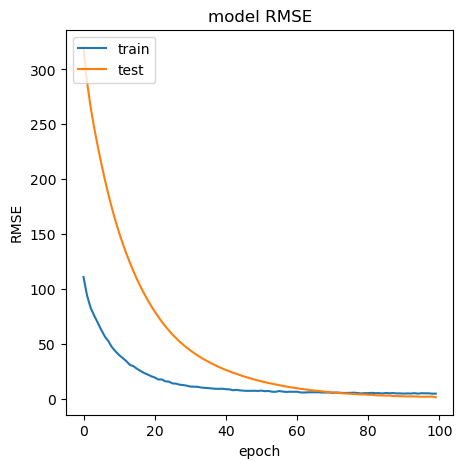

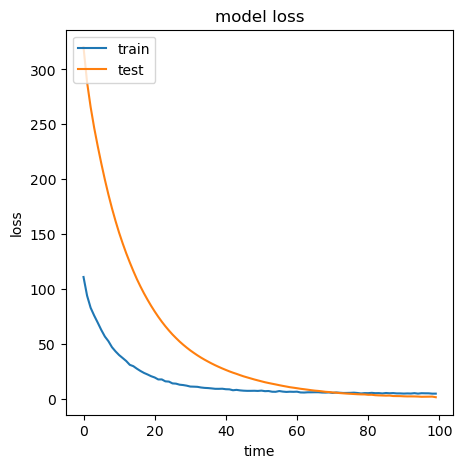

In [76]:
# summarize history for RMSE
fig_acc = plt.figure(figsize=(5, 5))
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model RMSE')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig_acc.savefig("LSTM_rmse1.png")
# summarize history for Loss
fig_acc = plt.figure(figsize=(5, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('time')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig_acc.savefig("LSTM_loss1.png")


## Validating our model

Now we need to create our simulated streaming validation set to test our model "in production

With our linear regression models, we were able to begin making predictions with only two datapoints, but the LSTM model requires an input sequence of seq_length to make a prediction. In other words in LSTM inorder to make our predicton, we need 30 datapoints. If we have less than 30 datapoints , we wont be able to make a prediction. This will cause a problem when we have to make our first prediction or the 30th prediction where we have datapoints less than 30. Padding helps us to solve this limitation of LSTM. What padding does is when we have datapoints less than 30, say for example we have just two datapoints, so padding completes the sequence length requirement which is of size 30 by adding 28 zeroes in there , thus satisying the condition of 30 data points . This will enable our LSTM model to make a prediction even when there are just 2 datapoints. In short, Padding can help to address the issue of having a sequence length requirement in LSTM models, by adding zeros or some other value to the sequence to make it the required length.

In [77]:
val_arrays = []
val_labs = []
val_Datetime = []
#create list of GAP readings starting with a minimum of two readings
for end in range(2, len(val_df)-ph):
#add short sequences until we reach the sequence length
    if end < seq_length:
        val_arrays.append(val_df[feat_cols][0:end].to_numpy())
        val_labs.append(val_df['T_30cm'][end+ph-1])
        val_Datetime.append(val_df['Datetime'][end-1])
#add sequences of seq_length once we have enough data
    else:
        val_arrays.append(val_df[feat_cols][end-seq_length:end].to_numpy())
        val_labs.append(val_df['T_30cm'][end+ph-1])
        val_Datetime.append(val_df['Datetime'][end-1])
# use the pad_sequences function on your input sequences
# remember that we will later want our datatype to be np.float32
val_arrays = pad_sequences(val_arrays, maxlen = seq_length, dtype = np.float32)
#convert to numpy arrays and floats to appease keras/tensorflow
val_labs = np.array(val_labs, dtype = object).astype(np.float32)


It takes the val_arrays as input, which is the array that needs to be padded.

The pad_sequences function is applied to val_arrays, and the result is assigned back to val_arrays.

The padding is added to the beginning of each sequence in val_arrays to make them all have a length of 30. If a sequence is shorter than 30, it will be padded with dummy values at the beginning to match the desired length.

The data type of the values in the padded sequence is set to np.float32.

After the padding is applied, the updated sequences are stored back in val_arrays.

In summary, this line of code pads the sequences in val_arrays to have a maximum length of 30, adds the padding at the beginning of each sequence, and ensures that the values in the padded sequence are of type float.

We will now run this validation data through our LSTM model 

50/50 - 0s - loss: 0.7191 - mse: 0.7191 - 221ms/epoch - 4ms/step

MSE: 0.7191160321235657
50/50 [==============================] - 1s 5ms/step


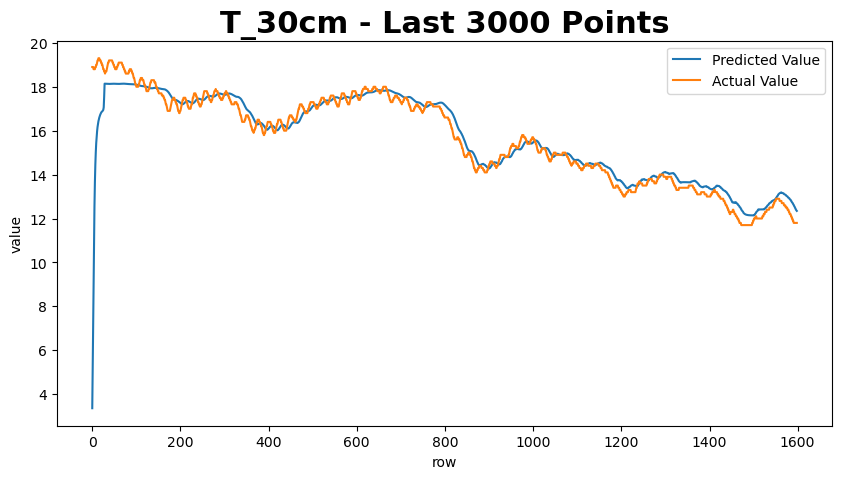

In [79]:
scores_test = model.evaluate(val_arrays, val_labs, verbose=2)
print('\nMSE: {}'.format(scores_test[1]))
y_pred_test = model.predict(val_arrays)
y_true_test = val_labs
y_Datetime_test=  val_Datetime
test_set = pd.DataFrame(y_pred_test)
test_set.to_csv('submit_test.csv', index = None)
# Plot the predicted data vs. the actual data
# we will limit our plot to the first 200 predictions for better visualization
fig_verify = plt.figure(figsize=(10, 5))
plt.plot(y_pred_test[-3000:], label = 'Predicted Value')
plt.plot(y_true_test[-3000:], label = 'Actual Value')
plt.title('T_30cm - Last 3000 Points', fontsize=22,
fontweight='bold')
plt.ylabel('value')
plt.xlabel('row')
plt.legend()
plt.show()
fig_verify.savefig("model_regression_verify.png")


Performance of the model :-

The loss function calculates the difference between the predicted and the actual output . This difference is
defined as the loss. for example if the expected output is 90 and the model predicts 84, then the loss function calculates this difference and then this difference is propogated backwards in the neural network
and the weights are updated. So for a model to work perfectly, the loss should go on decreasing . From the
loss curves of this model we can see that , for the training data, the loss decreases , as well as for the test data , its
decreasing . This implies that the model is  learning and the weights are  getting updated accordingly.
From the visualization , we can see that the predicted value follows the actual value quite closely on the validation set and  even the MSE is  low ie 0.719

In [80]:
print(y_pred_test)

[[ 3.3597462]
 [ 5.214251 ]
 [ 7.151582 ]
 ...
 [12.400667 ]
 [12.370143 ]
 [12.347046 ]]


In [81]:
y_pred_test = np.array(y_pred_test).flatten()

In [82]:
# Create a new DataFrame that includes even the predicted data
new_df = pd.DataFrame({"Datetime": y_Datetime_test, "temperature_pred": y_pred_test, "y_true_test": y_true_test})


In [83]:
new_df

,Datetime,temperature_pred,y_true_test
0,2014-08-28 04:00:00,3.359746,18.900000
1,2014-08-28 05:00:00,5.214251,18.900000
2,2014-08-28 06:00:00,7.151582,18.900000
3,2014-08-28 07:00:00,9.169613,18.799999
4,2014-08-28 08:00:00,11.048904,18.799999
...,...,...,...
1594,2014-11-02 14:00:00,12.485871,11.800000
1595,2014-11-02 15:00:00,12.456940,11.800000
1596,2014-11-02 16:00:00,12.400667,11.800000
1597,2014-11-02 17:00:00,12.370143,11.800000


## Model Optimization

Adding several convolutional layers to the
model before  running it through an LSTM layer

why?
Audio data often exhibits wave-like patterns over time.
The WaveNet architecture is a deep learning model that combines Convolutional Neural Networks (CNNs) and Long Short-Term Memory (LSTM) layers and is specifically designed to handle audio data. 
Since our data too exhibits wave-like patterns over time we decided to utilize the wavenet architecture.

In [84]:

from keras.layers import Conv1D, BatchNormalization
# defining path to save model
model_path = 'LSTM_model2.h5'
# building the network
nb_features = len(feat_cols) #number of features included in the training data
nb_out = 1 #expected output length
model = Sequential()
#adding first LSTM layer
model.add(Conv1D(32,
input_shape=(seq_length, nb_features),
kernel_size=2, padding="causal",
activation="relu"))
model.add(BatchNormalization())
model.add(Conv1D(48,
kernel_size=2,
padding="causal",
activation="relu",
dilation_rate=2))
model.add(BatchNormalization())
model.add(Conv1D(64,
kernel_size=2,
padding="causal",
activation="relu",
dilation_rate=4))
model.add(BatchNormalization())
model.add(LSTM(100))
model.add(Dense(units = nb_out))
model.add(Activation("linear"))
optimizer = keras.optimizers.Adam(learning_rate = 0.01)
model.compile(loss='mean_squared_error', optimizer=optimizer,metrics=['mse'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 30, 32)            96        
                                                                 
 batch_normalization (BatchN  (None, 30, 32)           128       
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 30, 48)            3120      
                                                                 
 batch_normalization_1 (Batc  (None, 30, 48)           192       
 hNormalization)                                                 
                                                                 
 conv1d_2 (Conv1D)           (None, 30, 64)            6208      
                                                                 
 batch_normalization_2 (Batc  (None, 30, 64)          

In [85]:
# fit the network
history = model.fit(seq_arrays, seq_labs, epochs=100, batch_size=100,
validation_split=0.05, verbose=2,
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss',
min_delta=0, patience=10, verbose=0, mode='min'),
keras.callbacks.
ModelCheckpoint(model_path,monitor='val_loss', save_best_only=True,
mode='min', verbose=0)]
)
# list all data in history
print(history.history.keys())


Epoch 1/100
61/61 - 7s - loss: 7.5980 - mse: 7.5980 - val_loss: 118.1019 - val_mse: 118.1019 - 7s/epoch - 108ms/step
Epoch 2/100
61/61 - 4s - loss: 0.5935 - mse: 0.5935 - val_loss: 47.3938 - val_mse: 47.3938 - 4s/epoch - 63ms/step
Epoch 3/100
61/61 - 4s - loss: 0.7789 - mse: 0.7789 - val_loss: 1.5520 - val_mse: 1.5520 - 4s/epoch - 64ms/step
Epoch 4/100
61/61 - 4s - loss: 0.6464 - mse: 0.6464 - val_loss: 1.4047 - val_mse: 1.4047 - 4s/epoch - 63ms/step
Epoch 5/100
61/61 - 4s - loss: 0.5321 - mse: 0.5321 - val_loss: 1.5229 - val_mse: 1.5229 - 4s/epoch - 63ms/step
Epoch 6/100
61/61 - 4s - loss: 0.6560 - mse: 0.6560 - val_loss: 1.5317 - val_mse: 1.5317 - 4s/epoch - 63ms/step
Epoch 7/100
61/61 - 4s - loss: 0.6319 - mse: 0.6319 - val_loss: 1.2592 - val_mse: 1.2592 - 4s/epoch - 64ms/step
Epoch 8/100
61/61 - 4s - loss: 0.3870 - mse: 0.3870 - val_loss: 0.7187 - val_mse: 0.7187 - 4s/epoch - 62ms/step
Epoch 9/100
61/61 - 4s - loss: 0.5246 - mse: 0.5246 - val_loss: 0.2891 - val_mse: 0.2891 - 4s/epo

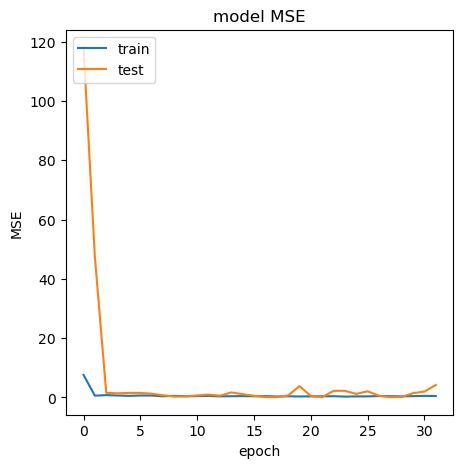

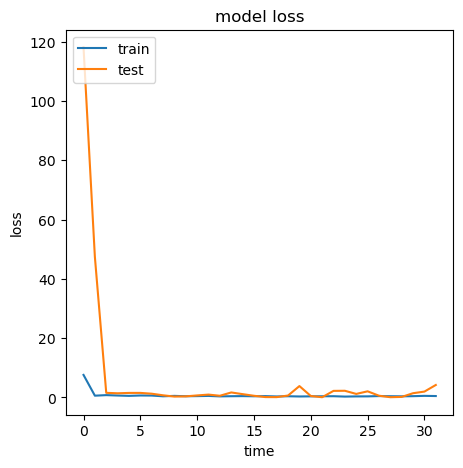

In [86]:
# summarize history for MSE
fig_acc = plt.figure(figsize=(5, 5))
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig_acc.savefig("LSTM_rmse2.png")
# summarize history for Loss
fig_acc = plt.figure(figsize=(5, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('time')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig_acc.savefig("LSTM_loss2.png")


50/50 - 0s - loss: 15.4859 - mse: 15.4859 - 490ms/epoch - 10ms/step

MSE: 15.48589038848877
50/50 [==============================] - 1s 11ms/step


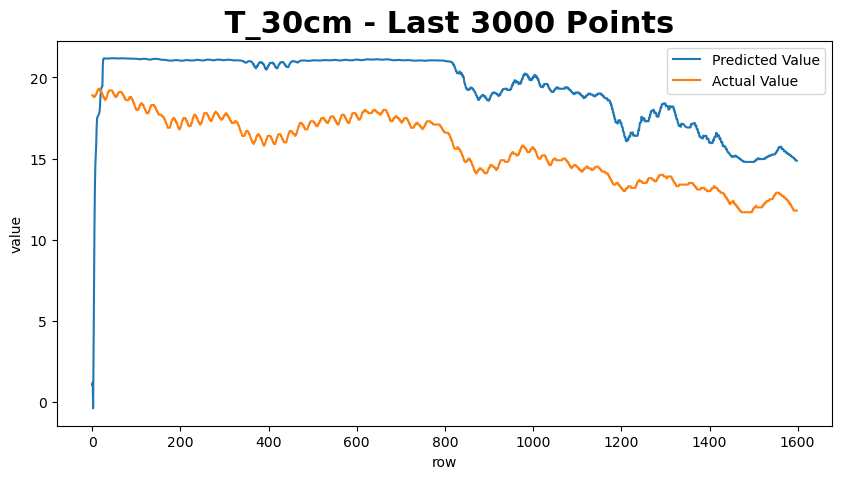

In [87]:

scores_test = model.evaluate(val_arrays, val_labs, verbose=2)
print('\nMSE: {}'.format(scores_test[1]))
y_pred_test = model.predict(val_arrays)
y_true_test = val_labs
test_set = pd.DataFrame(y_pred_test)
test_set.to_csv('submit_test.csv', index = None)
# Plot the predicted data vs. the actual data
# we will limit our plot to the first 200 predictions for better visualization
fig_verify = plt.figure(figsize=(10, 5))
plt.plot(y_pred_test[-3000:], label = 'Predicted Value')
plt.plot(y_true_test[-3000:], label = 'Actual Value')
plt.title(' T_30cm - Last 3000 Points',
fontsize=22, fontweight='bold')
plt.ylabel('value')
plt.xlabel('row')
plt.legend()
plt.show()
fig_verify.savefig("model_regression_verify.png")


After evaluating the above two  models, we have decided to choose the standard LSTM model without convolutional layers. This decision is based on several factors. Firstly, when applying the standard LSTM model on the validation set, we observed that the predicted values closely align with the actual data. Additionally, the mean squared error (MSE) value of the standard LSTM model is significantly lower at 0.719 compared to the LSTM model with convolutional layers, which had an MSE value of 15.485. These findings support the conclusion that the standard LSTM model is a better fit for the temperature prediction task.

## Utilizing a linear regression model for predicting moisture content  at a soil depth of 30 cm

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#suppress scientific notation in pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [96]:
from datetime import datetime

In [97]:
df['time_diff'] = 60
df['time'] = df.time_diff.cumsum()

In [98]:
df

,Location,Date,Time,VW_30cm,VW_60cm,VW_90cm,VW_120cm,VW_150cm,T_30cm,T_60cm,T_90cm,T_120cm,T_150cm,Datetime,VW_30cm_monthly,T_30cm_monthly,VW_60cm_monthly,T_60cm_monthly,time_diff,time
0,CAF310,2007-04-20,00:00:00,0.29500,0.31000,0.33100,0.34400,0.28300,11.40000,9.50000,9.40000,9.30000,9.00000,2007-04-20 00:00:00,NaN,NaN,NaN,NaN,60,60
1,CAF310,2007-04-20,01:00:00,0.29500,0.31000,0.33100,0.34400,0.28300,11.40000,9.50000,9.40000,9.30000,9.00000,2007-04-20 01:00:00,NaN,NaN,NaN,NaN,60,120
2,CAF310,2007-04-20,02:00:00,0.29500,0.31000,0.33100,0.34400,0.28300,11.40000,9.50000,9.40000,9.30000,9.00000,2007-04-20 02:00:00,NaN,NaN,NaN,NaN,60,180
3,CAF310,2007-04-20,03:00:00,0.29500,0.31000,0.33100,0.34400,0.28300,11.40000,9.50000,9.40000,9.30000,9.00000,2007-04-20 03:00:00,NaN,NaN,NaN,NaN,60,240
4,CAF310,2007-04-20,04:00:00,0.29500,0.31000,0.33100,0.34400,0.28300,11.40000,9.50000,9.40000,9.30000,9.00000,2007-04-20 04:00:00,NaN,NaN,NaN,NaN,60,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80299,CAF310,2016-06-16,19:00:00,0.29500,0.31000,0.33100,0.34400,0.28300,11.40000,9.50000,9.40000,9.30000,9.00000,2016-06-16 19:00:00,0.26503,17.12056,0.33537,14.04056,60,4818000
80300,CAF310,2016-06-16,20:00:00,0.29500,0.31000,0.33100,0.34400,0.28300,11.40000,9.50000,9.40000,9.30000,9.00000,2016-06-16 20:00:00,0.26502,17.11333,0.33532,14.03542,60,4818060
80301,CAF310,2016-06-16,21:00:00,0.29500,0.31000,0.33100,0.34400,0.28300,11.40000,9.50000,9.40000,9.30000,9.00000,2016-06-16 21:00:00,0.26501,17.10597,0.33527,14.03028,60,4818120
80302,CAF310,2016-06-16,22:00:00,0.29500,0.31000,0.33100,0.34400,0.28300,11.40000,9.50000,9.40000,9.30000,9.00000,2016-06-16 22:00:00,0.26499,17.09847,0.33521,14.02514,60,4818180


What is ph? What is mu?
In time series forecasting, the prediction horizon (ph) refers to the number of time steps into the future
that the model is designed to predict. It is essentially the forecasting horizon for the model. mu is the
forgetting factor or exponential decay.Since the moisture content readings of the soil are not going to be linear, we dont
want our historical data to have much influnce over the current prediction. The goal of mu is to assign more
weight to more recent data points and to reduce the weight of older data points in the forecast.

In [99]:
# ts = pd.DataFrame(df.time)
ts = pd.DataFrame(df.time[64500:])

# ys = pd.DataFrame(df['VW_30cm'])
ys = pd.DataFrame(df['VW_30cm'][64500:])


In [100]:
# MODEL FIT AND PREDICTION

# Parameters of the predictive model. ph is Prediction horizon, mu is Forgetting factor.
ph = 5*60 #300 minutes

ph_index = round(ph/60) # 5 rows between the "most recent" data and predictive horizon
mu = 0.9

In [101]:
#let's limit the number of samples in our model to 2000 just for speed
n_s = 2000

# Arrays to hold predicted values
tp_pred = np.zeros(n_s-1) 
yp_pred = np.zeros(n_s-1)

 With mu = 0.9 ,our first data point  will have a weight of 0.9^5000 = 1.6314e-229 which is practically zero on the last prediction in the dataset.

In [102]:
# At every iteration of the for loop a new data sample is acquired
for i in range(2, n_s+1):# start out with 2 leading datapoints
    #get x and y data "available" for our prediction
    ts_tmp = ts[0:i-1]
    ys_tmp = ys[ph_index-1:ph_index-1+i-1]
    ns = len(ys_tmp)
    
    
    weights = np.ones(ns)*mu
    for k in range(ns):
        #adjust weights to be downweighted according to their timestep away from our prediction
        weights[k] =  weights[k]**k
    weights = np.flip(weights, 0)
        
    #perform linear regression on "available" data using the mu-adjusted weights
    lm_tmp = LinearRegression()
    model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight = weights)
    
    #store model coefficients and intercepts to compute prediction
    m_tmp = model_tmp.coef_
    q_tmp = model_tmp.intercept_

    #use ph to make the model prediction according to the prediction time
    tp =  ts.iloc[i-1,0] + ph
    yp = m_tmp * tp + q_tmp
      
    tp_pred[i-2] = tp 
    yp_pred[i-2] = yp

Now let's visualize the results from our model.

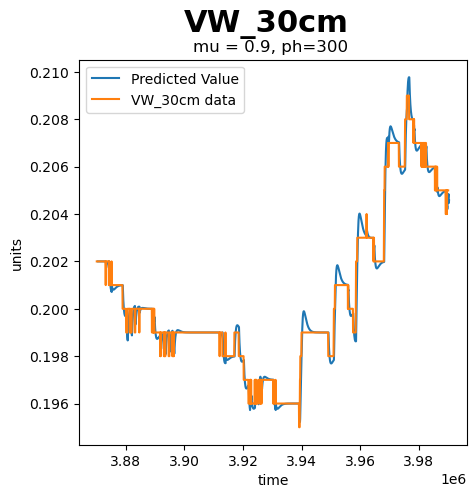

In [104]:
fig, ax = plt.subplots(figsize=(5,5))
fig.suptitle('VW_30cm', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred, yp_pred, label='Predicted Value') 
ax.plot(ts.iloc[0:n_s,0], ys.iloc[0:n_s,0], label='VW_30cm data') 
ax.set_xlabel('time')
ax.set_ylabel('units')
ax.legend()

Modifying the code above to visualize the first and last 1000 datapoints/predictions (can be in separate charts) and computing the MSE for our predictions.

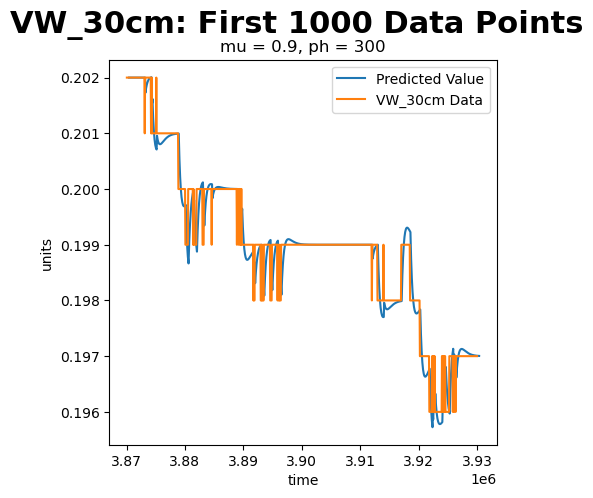

In [105]:
#Plotting first 1000 data points/predictions
from sklearn.metrics import mean_squared_error

fig = plt.figure(figsize=(5,5))
ax=fig.subplots()
fig.suptitle('VW_30cm: First 1000 Data Points', fontsize = 22, fontweight = "bold")
ax.set_title('mu = %g, ph = %g' %(mu,ph))
ax.plot(tp_pred[0:1000], yp_pred[0:1000], label = 'Predicted Value')
ax.plot(ts.iloc[0:1000,0], ys.iloc[0:1000, 0], label = 'VW_30cm Data')
ax.set_xlabel('time')
ax.set_ylabel('units')
ax.legend()
plt.show()

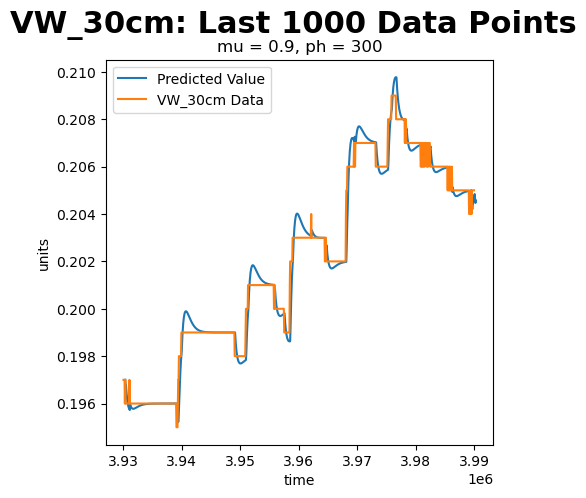

In [106]:
#Plotting last 1000 data points/predictions
from sklearn.metrics import mean_squared_error

fig = plt.figure(figsize=(5,5))
ax=fig.subplots()
fig.suptitle('VW_30cm: Last 1000 Data Points', fontsize = 22, fontweight = "bold")
ax.set_title('mu = %g, ph = %g' %(mu,ph))
ax.plot(tp_pred[-1000:], yp_pred[-1000:], label = 'Predicted Value')
ax.plot(ts.iloc[n_s-1000:n_s,0], ys.iloc[n_s-1000:n_s,0], label = 'VW_30cm Data')
ax.set_xlabel('time')
ax.set_ylabel('units')
ax.legend()
plt.show()

In [107]:
from sklearn.metrics import mean_squared_error 


In [108]:
#Calculating MSE of predictions
print("MSE is", mean_squared_error(ys['VW_30cm'][ph_index:2000+ph_index-1],yp_pred))

MSE is 1.540072407418831e-07


The model performs pretty well! 
The predicted values are following the actual values pretty closely.

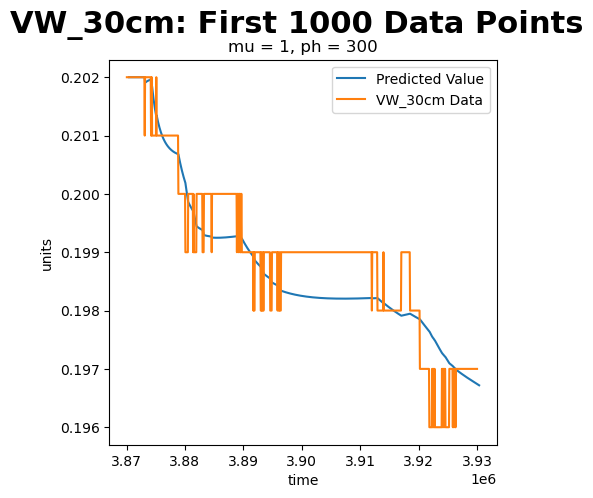

In [109]:
#Plotting first 1000 data points/predictions for mu = 1
# MODEL FIT AND PREDICTION

# Parameters of the predictive model. ph is Prediction horizon, mu is Forgetting factor.
ph = 5*60 #300 minutes

ph_index = round(ph/60) # 5 rows between the "most recent" data and predictive horizon
mu = 1

# ts = pd.DataFrame(df.time)
# ys = pd.DataFrame(df['VW_30cm'])
# ts = pd.DataFrame(df.time)
ts = pd.DataFrame(df.time[64500:])

# ys = pd.DataFrame(df['VW_30cm'])
ys = pd.DataFrame(df['VW_30cm'][64500:])

n_s = 2000

tp_pred = np.zeros(n_s - 1)
yp_pred = np.zeros(n_s - 1)

for i in range(2, n_s+1):# start out with 2 leading datapoints
    #get x and y data "available" for our prediction
    ts_tmp = ts[0:i]
    ys_tmp = ys[ph_index-1:ph_index-1+i]
    ns = len(ys_tmp)
    
    
    weights = np.ones(ns)*mu
    for k in range(ns):
        #adjust weights to be downweighted according to their timestep away from our prediction
        weights[k] =  weights[k]**k
    weights = np.flip(weights, 0)
        
    #perform linear regression on "available" data using the mu-adjusted weights
    lm_tmp = LinearRegression()
    model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight = weights)
    
    #store model coefficients and intercepts to compute prediction
    m_tmp = model_tmp.coef_
    q_tmp = model_tmp.intercept_

    #use ph to make the model prediction according to the prediction time
    tp =  ts.iloc[i-1,0] + ph
    yp = m_tmp * tp + q_tmp
      
    tp_pred[i-2] = tp 
    yp_pred[i-2] = yp

fig = plt.figure(figsize=(5,5))
ax=fig.subplots()
fig.suptitle('VW_30cm: First 1000 Data Points', fontsize = 22, fontweight = "bold")
ax.set_title('mu = 1, ph = %g' %(ph))
ax.plot(tp_pred[0:1000], yp_pred[0:1000], label = 'Predicted Value')
ax.plot(ts.iloc[0:1000,0], ys.iloc[0:1000, 0], label = 'VW_30cm Data')
ax.set_xlabel('time')
ax.set_ylabel('units')
ax.legend()
plt.show()

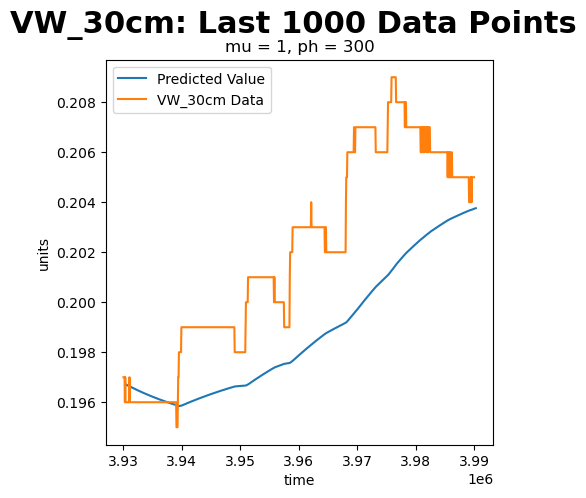

In [110]:
#Plotting last 1000 data points/predictions for mu = 1
ph = 5*60 #300 minutes

ph_index = round(ph/60) # 5 rows between the "most recent" data and predictive horizon
mu = 1

# ts = pd.DataFrame(df.time)
# ys = pd.DataFrame(df['VW_30cm'])
# ts = pd.DataFrame(df.time)
ts = pd.DataFrame(df.time[64500:])

# ys = pd.DataFrame(df['VW_30cm'])
ys = pd.DataFrame(df['VW_30cm'][64500:])


n_s = 2000

tp_pred = np.zeros(n_s - 1)
yp_pred = np.zeros(n_s - 1)

for i in range(2, n_s+1):# start out with 2 leading datapoints
    #get x and y data "available" for our prediction
    ts_tmp = ts[0:i]
    ys_tmp = ys[ph_index-1:ph_index-1+i]
    ns = len(ys_tmp)
    
    
    weights = np.ones(ns)*mu
    for k in range(ns):
        #adjust weights to be downweighted according to their timestep away from our prediction
        weights[k] =  weights[k]**k
    weights = np.flip(weights, 0)
        
    #perform linear regression on "available" data using the mu-adjusted weights
    lm_tmp = LinearRegression()
    model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight = weights)
    
    #store model coefficients and intercepts to compute prediction
    m_tmp = model_tmp.coef_
    q_tmp = model_tmp.intercept_

    #use ph to make the model prediction according to the prediction time
    tp =  ts.iloc[i-1,0] + ph
    yp = m_tmp * tp + q_tmp
      
    tp_pred[i-2] = tp 
    yp_pred[i-2] = yp

fig = plt.figure(figsize=(5,5));
ax=fig.subplots()
fig.suptitle('VW_30cm: Last 1000 Data Points', fontsize = 22, fontweight = "bold")
ax.set_title('mu = 1, ph = %g' %(ph))
ax.plot(tp_pred[-1000:], yp_pred[-1000:], label = 'Predicted Value')
ax.plot(ts.iloc[n_s-1000:n_s,0], ys.iloc[n_s-1000:n_s,0], label = 'VW_30cm Data')
ax.set_xlabel('time')
ax.set_ylabel('units')
ax.legend()
plt.show()






In [111]:
#Calculating the MSE of predictions for mu = 1
print("MSE is", mean_squared_error(ys['VW_30cm'][ph_index:2000+ph_index-1],yp_pred))

MSE is 7.53134157455515e-06


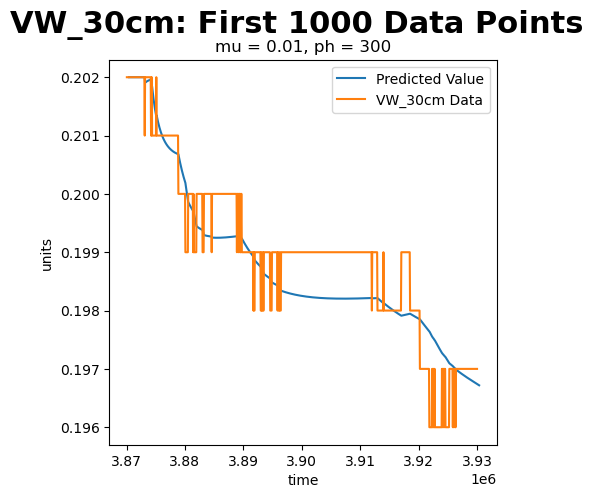

In [112]:
#Plotting first 1000 data points/predictions for mu = 0.01


ph = 5*60 #300 minutes

ph_index = round(ph/60) # 5 rows between the "most recent" data and predictive horizon
mu = 1

# ts = pd.DataFrame(df.time)
# ys = pd.DataFrame(df['VW_30cm'])
# ts = pd.DataFrame(df.time)
ts = pd.DataFrame(df.time[64500:])

# ys = pd.DataFrame(df['VW_30cm'])
ys = pd.DataFrame(df['VW_30cm'][64500:])

n_s = 2000

tp_pred = np.zeros(n_s - 1)
yp_pred = np.zeros(n_s - 1)

for i in range(2, n_s+1):# start out with 2 leading datapoints
    #get x and y data "available" for our prediction
    ts_tmp = ts[0:i]
    ys_tmp = ys[ph_index-1:ph_index-1+i]
    ns = len(ys_tmp)
    
    
    weights = np.ones(ns)*mu
    for k in range(ns):
        #adjust weights to be downweighted according to their timestep away from our prediction
        weights[k] =  weights[k]**k
    weights = np.flip(weights, 0)
        
    #perform linear regression on "available" data using the mu-adjusted weights
    lm_tmp = LinearRegression()
    model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight = weights)
    
    #store model coefficients and intercepts to compute prediction
    m_tmp = model_tmp.coef_
    q_tmp = model_tmp.intercept_

    #use ph to make the model prediction according to the prediction time
    tp =  ts.iloc[i-1,0] + ph
    yp = m_tmp * tp + q_tmp
      
    tp_pred[i-2] = tp 
    yp_pred[i-2] = yp

fig = plt.figure(figsize=(5,5))
ax=fig.subplots()
fig.suptitle('VW_30cm: First 1000 Data Points', fontsize = 22, fontweight = "bold")
ax.set_title('mu = 0.01, ph = %g' %(ph))
ax.plot(tp_pred[0:1000], yp_pred[0:1000], label = 'Predicted Value')
ax.plot(ts.iloc[0:1000,0], ys.iloc[0:1000, 0], label = 'VW_30cm Data')
ax.set_xlabel('time')
ax.set_ylabel('units')
ax.legend()
plt.show()


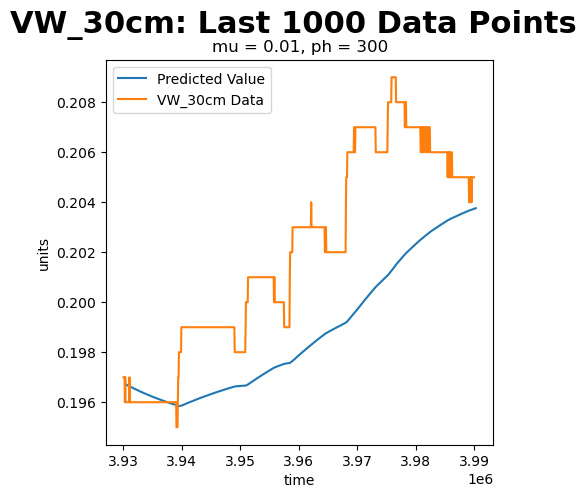

In [113]:
#Plotting last 1000 data points/predictions for mu = 0.01
ph = 5*60 #300 minutes

ph_index = round(ph/60) # 5 rows between the "most recent" data and predictive horizon
mu = 1

# ts = pd.DataFrame(df.time)
# ys = pd.DataFrame(df['VW_30cm'])
# ts = pd.DataFrame(df.time)
ts = pd.DataFrame(df.time[64500:])

# ys = pd.DataFrame(df['VW_30cm'])
ys = pd.DataFrame(df['VW_30cm'][64500:])


n_s = 2000

tp_pred = np.zeros(n_s - 1)
yp_pred = np.zeros(n_s - 1)

for i in range(2, n_s+1):# start out with 2 leading datapoints
    #get x and y data "available" for our prediction
    ts_tmp = ts[0:i]
    ys_tmp = ys[ph_index-1:ph_index-1+i]
    ns = len(ys_tmp)
    
    
    weights = np.ones(ns)*mu
    for k in range(ns):
        #adjust weights to be downweighted according to their timestep away from our prediction
        weights[k] =  weights[k]**k
    weights = np.flip(weights, 0)
        
    #perform linear regression on "available" data using the mu-adjusted weights
    lm_tmp = LinearRegression()
    model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight = weights)
    
    #store model coefficients and intercepts to compute prediction
    m_tmp = model_tmp.coef_
    q_tmp = model_tmp.intercept_

    #use ph to make the model prediction according to the prediction time
    tp =  ts.iloc[i-1,0] + ph
    yp = m_tmp * tp + q_tmp
      
    tp_pred[i-2] = tp 
    yp_pred[i-2] = yp

fig = plt.figure(figsize=(5,5))
ax=fig.subplots()
fig.suptitle('VW_30cm: Last 1000 Data Points', fontsize = 22, fontweight = "bold")
ax.set_title('mu = 0.01, ph = %g' %(ph))
ax.plot(tp_pred[-1000:], yp_pred[-1000:], label = 'Predicted Value')
ax.plot(ts.iloc[n_s-1000:n_s,0], ys.iloc[n_s-1000:n_s,0], label = 'VW_30cm Data')
ax.set_xlabel('time')
ax.set_ylabel('units')
ax.legend()
plt.show()

In [114]:
#Calculating MSE of predictions for mu = 0.01
print("MSE is", mean_squared_error(ys['VW_30cm'][ph_index:2000+ph_index-1],yp_pred))

MSE is 7.53134157455515e-06


How did our mu = 1 model perform? What did we observe on the charts?  What does the MSE tell us?

When we assign a value of 1 to the mu factor, we are treating all the data points in our history equally
when making predictions. So, when we reach the 2000th data point, we are simply calculating the average
moisture content at 30 cm of depth readings over the entire period, which is not an effective way to make accurate predictions.This is exactly what we see in the plots . Predicted values, Its just nothing like the actual data.
The MSE for mu=1 is 7.53134157455515e-06. The MSE for mu=0.9 is 1.540072407418831e-07 . This prooves that the model with mu=0.9 is better than the model with mu=1.

 Which of these three models is the best? How do we know? Why does this make
sense based on the mu parameter used?
The model with mu=0.9 is the best. We can observe that for the first 1000 data points as well as for the last
1000 data points , the predicted data follows the actual data . The forecasted data shows a slight delay compared to the actual
data, but it closely tracks the actual data. This lag is expected because we are using a linear model to predict
moisture content readings, even though   its not linear.
The small MSE of the model with mu=0.9 too prooves this.



So far, our Linear regression models have been predicting the moisture content  based on the previous moisture content readings alone (since time is our only variable). We will add more variables to give the model more information

Adding temperature  data  at a soil depth of 30 cm as a second variable to our model and re-running the prediction code. Then visualizing the first and last 1000 points and computing the MSE

In [115]:
#add temperature to the x-variables in our dataset
# ts = pd.DataFrame(df[['time', 'T_30cm']])
ts = pd.DataFrame(df[['time', 'T_30cm']][64500:])

ys = pd.DataFrame(df['VW_30cm'][64500:])


# ys = pd.DataFrame(df['VW_30cm'])

ph = 5*60 #300 minutes
ph_index = round(ph/60)
mu = 0.9
#let's limit the number of samples in our model to 2000 just for speed
n_s = 2000
#arrays to hold predicted values
tp_pred = np.zeros(n_s-1)
yp_pred = np.zeros(n_s-1)

In [116]:

# At every iteration of the for loop a new data sample is acquired
for i in range(2, n_s+1):# start out with 2 leading datapoints
#get x and y data "available" for our prediction
    ts_tmp = ts[0:i-1]
    ys_tmp = ys[ph_index-1:ph_index-1+i-1]
    ns = len(ys_tmp)
    weights = np.ones(ns)*mu
    for k in range(ns):
#adjust weights to be downweighted according to their timestep away from our prediction
        weights[k] = weights[k]**k
    weights = np.flip(weights, 0)
#perform linear regression on "available" data using the mu-adjusted weights
    lm_tmp = LinearRegression()
    model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)# times are x, glucose readings are y
#store model coefficients and intercepts to compute prediction
    m_tmp = model_tmp.coef_
    q_tmp = model_tmp.intercept_
#use ph to make the model prediction according to the prediction time
    tp = ts.iloc[i,0] #current time
    vp = ts.iloc[i,1] #current voltage
    yp = m_tmp[0,0]*tp + m_tmp[0,1]*vp + q_tmp #mx1 + mx2 + b
    tp_pred[i-2] = tp +ph
    yp_pred[i-2] = yp


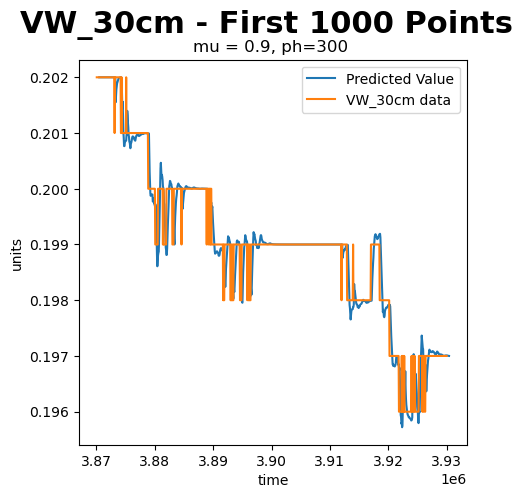

In [117]:
#Plotting first 1000 data points/predictions for the expanded dataset
fig, ax = plt.subplots(figsize=(5,5))
fig.suptitle('VW_30cm - First 1000 Points', fontsize=22,
fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[0:1000], yp_pred[0:1000], label='Predicted Value')
ax.plot(ts.iloc[0:1000,0], ys.iloc[0:1000,0], label='VW_30cm data')
ax.set_xlabel('time')
ax.set_ylabel('units')
ax.legend()


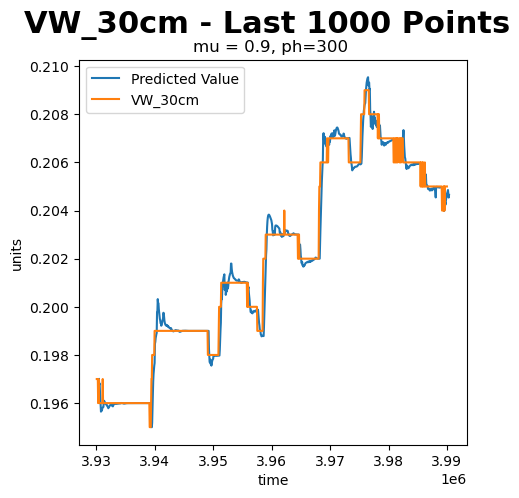

In [118]:
#Plotting last 1000 data points/predictions for the expanded data
fig, ax = plt.subplots(figsize=(5,5))
fig.suptitle('VW_30cm - Last 1000 Points', fontsize=22,
fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[-1000:], yp_pred[-1000:], label='Predicted Value')
ax.plot(ts.iloc[n_s-1000:n_s,0], ys.iloc[n_s-1000:n_s,0], label='VW_30cm')
ax.set_xlabel('time')
ax.set_ylabel('units')
ax.legend()

In [119]:
from sklearn.metrics import mean_squared_error as mse


In [120]:
#Calculating MSE of predictions for the expanded data
print("MSE with the expanded data is", mse(ys[ph_index:2000+ph_index-1],yp_pred))

MSE with the expanded data is 1.1894924036207728e-07


The inclusion of temperature data has further enhanced the performance of the model. This improvement is logical because we are providing the model with additional information beyond solely the past moisture content values. Our exploratory data analysis also did not indicate a correlation between moisture content and temperature, so it is expected that incorporating temperature data would lead to improved predictions.

We now chose to predict a 30-day moving average. This will be a much smoother measure and
might be easier for a linear model to predict.

In [121]:



#add temperature to the x-variables in our dataset
# ts = pd.DataFrame(df[['time', 'T_30cm_monthly']])
# ys = pd.DataFrame(df.VW_30cm_monthly)

ts = pd.DataFrame(df[['time', 'T_30cm_monthly']][64500:])

ys = pd.DataFrame(df['VW_30cm_monthly'][64500:])

ph = 5*60 #300 minutes
ph_index = round(ph/60)
mu = 0.9
#let's limit the number of samples in our model to 2000 just for speed
n_s = 2000
#arrays to hold predicted values
tp_pred = np.zeros(n_s-721)
yp_pred = np.zeros(n_s-721)


In [122]:
#re-run the prediction code here

# At every iteration of the for loop a new data sample is acquired
for i in range(722, n_s+1):# start out with 2 leading datapoints and skip the 30 NaN values
#get x and y data "available" for our prediction
    ts_tmp = ts[720:i-1]
    ys_tmp = ys[720+ph_index-1:ph_index-1+i-1]
    ns = len(ys_tmp)
    weights = np.ones(ns)*mu
    for k in range(ns):
#adjust weights to be downweighted according to their timestep away␣ from our prediction
        weights[k] = weights[k]**k
    weights = np.flip(weights, 0)
#perform linear regression on "available" data using the mu-adjusted weights
    lm_tmp = LinearRegression()
    model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)# times are x,␣glucose readings are y
#store model coefficients and intercepts to compute prediction
    m_tmp = model_tmp.coef_
    q_tmp = model_tmp.intercept_
#use ph to make the model prediction according to the prediction time
    tp = ts.iloc[i,0] #current time
    vp = ts.iloc[i,1] #current moving average
    yp = m_tmp[0,0]*tp + m_tmp[0,1]*vp + q_tmp #mx1 + mx2 + b
    tp_pred[i-722] = tp + ph
    yp_pred[i-722] = yp


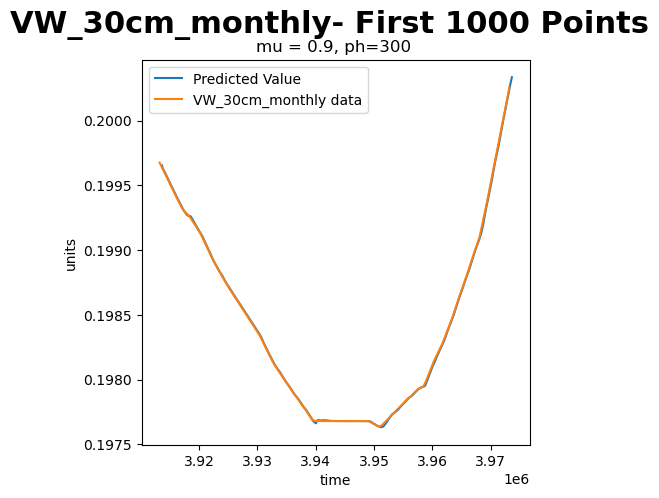

In [123]:
#Plotting first 1000 data points/predictions for a moving average
fig, ax = plt.subplots(figsize=(5,5))
fig.suptitle('VW_30cm_monthly- First 1000 Points', fontsize=22,
fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[0:1000], yp_pred[0:1000], label='Predicted Value')
ax.plot(ts.iloc[720:1720,0], ys.iloc[720:1720,0], label='VW_30cm_monthly data')
ax.set_xlabel('time')
ax.set_ylabel('units')
ax.legend()

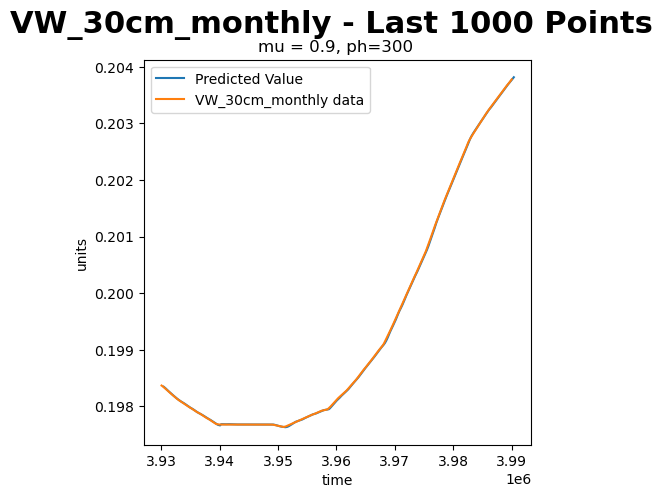

In [124]:
#Plotting last 1000 data points/predictions for a moving average
fig, ax = plt.subplots(figsize=(5,5))
fig.suptitle('VW_30cm_monthly - Last 1000 Points', fontsize=22,
fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[-1000:], yp_pred[-1000:], label='Predicted Value')
ax.plot(ts.iloc[n_s-1000:n_s,0], ys.iloc[n_s-1000:n_s,0], label='VW_30cm_monthly data')
ax.set_xlabel('time')
ax.set_ylabel('units')
ax.legend()

In [125]:
#Calculating MSE of predictions for moving average
print("MSE with a moving average is", mse(ys[ph_index+720:
2000+ph_index-1],yp_pred))


MSE with a moving average is 7.654973094557386e-11


Using the moving average for both the moisture and temperature data improved the model even further.
Therefore we will select this model for the moisture prediction task.

Merging the predicted moisture content values at a soil depth of 30 cm with df 


In [126]:
pred = pd.DataFrame({"time":tp_pred, "moisture_pred": yp_pred})
df = df.merge(pred, how = 'left', left_on = 'time', right_on = 'time')
# pred_df.iloc[:2001].to_csv("cgm_prediction_data.csv")

In [127]:
df

,Location,Date,Time,VW_30cm,VW_60cm,VW_90cm,VW_120cm,VW_150cm,T_30cm,T_60cm,...,T_120cm,T_150cm,Datetime,VW_30cm_monthly,T_30cm_monthly,VW_60cm_monthly,T_60cm_monthly,time_diff,time,moisture_pred
0,CAF310,2007-04-20,00:00:00,0.29500,0.31000,0.33100,0.34400,0.28300,11.40000,9.50000,...,9.30000,9.00000,2007-04-20 00:00:00,NaN,NaN,NaN,NaN,60,60,NaN
1,CAF310,2007-04-20,01:00:00,0.29500,0.31000,0.33100,0.34400,0.28300,11.40000,9.50000,...,9.30000,9.00000,2007-04-20 01:00:00,NaN,NaN,NaN,NaN,60,120,NaN
2,CAF310,2007-04-20,02:00:00,0.29500,0.31000,0.33100,0.34400,0.28300,11.40000,9.50000,...,9.30000,9.00000,2007-04-20 02:00:00,NaN,NaN,NaN,NaN,60,180,NaN
3,CAF310,2007-04-20,03:00:00,0.29500,0.31000,0.33100,0.34400,0.28300,11.40000,9.50000,...,9.30000,9.00000,2007-04-20 03:00:00,NaN,NaN,NaN,NaN,60,240,NaN
4,CAF310,2007-04-20,04:00:00,0.29500,0.31000,0.33100,0.34400,0.28300,11.40000,9.50000,...,9.30000,9.00000,2007-04-20 04:00:00,NaN,NaN,NaN,NaN,60,300,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80299,CAF310,2016-06-16,19:00:00,0.29500,0.31000,0.33100,0.34400,0.28300,11.40000,9.50000,...,9.30000,9.00000,2016-06-16 19:00:00,0.26503,17.12056,0.33537,14.04056,60,4818000,NaN
80300,CAF310,2016-06-16,20:00:00,0.29500,0.31000,0.33100,0.34400,0.28300,11.40000,9.50000,...,9.30000,9.00000,2016-06-16 20:00:00,0.26502,17.11333,0.33532,14.03542,60,4818060,NaN
80301,CAF310,2016-06-16,21:00:00,0.29500,0.31000,0.33100,0.34400,0.28300,11.40000,9.50000,...,9.30000,9.00000,2016-06-16 21:00:00,0.26501,17.10597,0.33527,14.03028,60,4818120,NaN
80302,CAF310,2016-06-16,22:00:00,0.29500,0.31000,0.33100,0.34400,0.28300,11.40000,9.50000,...,9.30000,9.00000,2016-06-16 22:00:00,0.26499,17.09847,0.33521,14.02514,60,4818180,NaN


new_df is that dataframe which contains our predicted temperature values using LSTM model at a 30 cm depth.

In [129]:
new_df

,Datetime,temperature_pred,y_true_test
0,2014-08-28 04:00:00,3.35975,18.90000
1,2014-08-28 05:00:00,5.21425,18.90000
2,2014-08-28 06:00:00,7.15158,18.90000
3,2014-08-28 07:00:00,9.16961,18.80000
4,2014-08-28 08:00:00,11.04890,18.80000
...,...,...,...
1594,2014-11-02 14:00:00,12.48587,11.80000
1595,2014-11-02 15:00:00,12.45694,11.80000
1596,2014-11-02 16:00:00,12.40067,11.80000
1597,2014-11-02 17:00:00,12.37014,11.80000


Merging new_df with df

In [131]:
df = df.merge(new_df, how = 'left', left_on = 'Datetime', right_on = 'Datetime')

In [132]:
df

,Location,Date,Time,VW_30cm,VW_60cm,VW_90cm,VW_120cm,VW_150cm,T_30cm,T_60cm,...,Datetime,VW_30cm_monthly,T_30cm_monthly,VW_60cm_monthly,T_60cm_monthly,time_diff,time,moisture_pred,temperature_pred,y_true_test
0,CAF310,2007-04-20,00:00:00,0.29500,0.31000,0.33100,0.34400,0.28300,11.40000,9.50000,...,2007-04-20 00:00:00,NaN,NaN,NaN,NaN,60,60,NaN,NaN,NaN
1,CAF310,2007-04-20,01:00:00,0.29500,0.31000,0.33100,0.34400,0.28300,11.40000,9.50000,...,2007-04-20 01:00:00,NaN,NaN,NaN,NaN,60,120,NaN,NaN,NaN
2,CAF310,2007-04-20,02:00:00,0.29500,0.31000,0.33100,0.34400,0.28300,11.40000,9.50000,...,2007-04-20 02:00:00,NaN,NaN,NaN,NaN,60,180,NaN,NaN,NaN
3,CAF310,2007-04-20,03:00:00,0.29500,0.31000,0.33100,0.34400,0.28300,11.40000,9.50000,...,2007-04-20 03:00:00,NaN,NaN,NaN,NaN,60,240,NaN,NaN,NaN
4,CAF310,2007-04-20,04:00:00,0.29500,0.31000,0.33100,0.34400,0.28300,11.40000,9.50000,...,2007-04-20 04:00:00,NaN,NaN,NaN,NaN,60,300,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80299,CAF310,2016-06-16,19:00:00,0.29500,0.31000,0.33100,0.34400,0.28300,11.40000,9.50000,...,2016-06-16 19:00:00,0.26503,17.12056,0.33537,14.04056,60,4818000,NaN,NaN,NaN
80300,CAF310,2016-06-16,20:00:00,0.29500,0.31000,0.33100,0.34400,0.28300,11.40000,9.50000,...,2016-06-16 20:00:00,0.26502,17.11333,0.33532,14.03542,60,4818060,NaN,NaN,NaN
80301,CAF310,2016-06-16,21:00:00,0.29500,0.31000,0.33100,0.34400,0.28300,11.40000,9.50000,...,2016-06-16 21:00:00,0.26501,17.10597,0.33527,14.03028,60,4818120,NaN,NaN,NaN
80302,CAF310,2016-06-16,22:00:00,0.29500,0.31000,0.33100,0.34400,0.28300,11.40000,9.50000,...,2016-06-16 22:00:00,0.26499,17.09847,0.33521,14.02514,60,4818180,NaN,NaN,NaN


In [135]:
# Extract rows where both temperature_pred and moisture_pred are not NaN
not_null_rows = df[df['temperature_pred'].notnull() & df['moisture_pred'].notnull()]

# Print the extracted rows
print(not_null_rows)


      Location        Date      Time  VW_30cm  VW_60cm  VW_90cm  VW_120cm  \
65227   CAF310  2014-09-27  19:00:00  0.19800  0.20200  0.22800   0.24200   
65228   CAF310  2014-09-27  20:00:00  0.19800  0.20200  0.22800   0.24200   
65229   CAF310  2014-09-27  21:00:00  0.19800  0.20200  0.22800   0.24200   
65230   CAF310  2014-09-27  22:00:00  0.19800  0.20200  0.22800   0.24200   
65231   CAF310  2014-09-27  23:00:00  0.19800  0.20200  0.22800   0.24200   
...        ...         ...       ...      ...      ...      ...       ...   
66086   CAF310  2014-11-02  14:00:00  0.20200  0.19700  0.22500   0.24000   
66087   CAF310  2014-11-02  15:00:00  0.20200  0.19700  0.22500   0.24000   
66088   CAF310  2014-11-02  16:00:00  0.20200  0.19700  0.22500   0.24000   
66089   CAF310  2014-11-02  17:00:00  0.20200  0.19700  0.22500   0.24000   
66090   CAF310  2014-11-02  18:00:00  0.20200  0.19700  0.22500   0.24000   

       VW_150cm   T_30cm   T_60cm  ...            Datetime  VW_30cm_monthly

Creating a new dataframe named not_null_rows that contains only the filtered rows from the above step

In [136]:
not_null_df = pd.DataFrame(not_null_rows)


exporting  the first 2001 rows of the dataframe not_null_df to a CSV file named "final_proj1.csv".

In [137]:
not_null_df.iloc[:2001].to_csv("final_proj1.csv")